In [1]:
import score_tuner
import logging

In [2]:
scores_df, y_expected = score_tuner.load_pickled_scores("temp_pickled_scores_df.dump", "temp_pickled_y_expected.dump")

### Plots of category scores before tuning

In [3]:
selected_category = "cdk"
category_scores_series = scores_df[selected_category]
category_scores_series.describe()

count    4.347800e+04
mean     1.420021e-03
std      1.581817e-02
min      3.687004e-08
25%      6.649076e-05
50%      1.875532e-04
75%      5.022167e-04
max      6.795897e-01
Name: cdk, dtype: float64

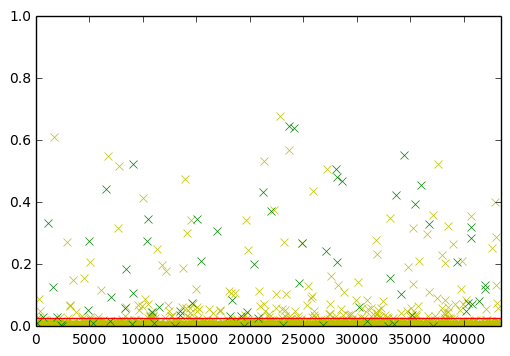

In [4]:
# small category plot
import matplotlib.pyplot as plt
%matplotlib inline

doc_number = range(max(category_scores_series.index))

correct_scores = category_scores_series[y_expected == selected_category]
incorrect_scores = category_scores_series[y_expected != selected_category]

category_beta = score_tuner.beta_for_categories_provider(y_expected)[selected_category]
opt_threshold = score_tuner.maximize_f_score(y_expected, category_scores_series, selected_category, category_beta)

plt.plot(incorrect_scores.index, incorrect_scores.values, 'yx')
plt.plot(correct_scores.index, correct_scores.values, 'gx')
plt.plot([min(category_scores_series.index), max(category_scores_series.index)], [opt_threshold]*2, 'r')

plt.axis([0, max(doc_number), 0, 1])
plt.show()

In [5]:
opt_threshold

0.028662074627219907

In [6]:
selected_category = "openshift"
category_scores_series = scores_df[selected_category]
category_scores_series.describe()

count    4.347800e+04
mean     7.774933e-02
std      2.372750e-01
min      3.213370e-09
25%      1.659353e-04
50%      9.716645e-04
75%      5.995112e-03
max      9.985922e-01
Name: openshift, dtype: float64

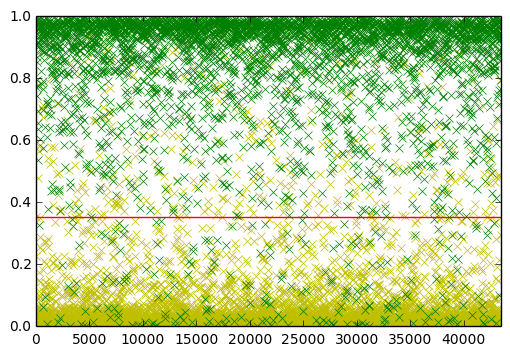

In [7]:
# small category scores plot with threshold as based on f-score with selected beta for given category
import matplotlib.pyplot as plt

doc_number = range(max(category_scores_series.index))
correct_scores = category_scores_series[y_expected == selected_category]
incorrect_scores = category_scores_series[y_expected != selected_category]

category_beta = score_tuner.beta_for_categories_provider(y_expected)[selected_category]
opt_threshold = score_tuner.maximize_f_score(y_expected, category_scores_series, selected_category, category_beta)

plt.plot(incorrect_scores.index, incorrect_scores.values, 'yx')
plt.plot(correct_scores.index, correct_scores.values, 'gx')
plt.plot([min(category_scores_series.index), max(category_scores_series.index)], [opt_threshold]*2, 'r')

plt.axis([0, max(doc_number), 0, 1])
plt.show()

In [8]:
opt_threshold

0.35448913149212435

### Plots of category scores after tuning

In [9]:
score_df_norm = score_tuner.normalize_all_cats_scores(y_expected, scores_df)

In [10]:
selected_category = "cdk"
category_scores_series = score_df_norm[selected_category]
category_scores_series.describe()

count    4.347800e+04
mean     1.365186e-02
std      4.981842e-02
min      6.431850e-07
25%      1.159908e-03
50%      3.271802e-03
75%      8.760998e-03
max      8.350676e-01
Name: cdk, dtype: float64

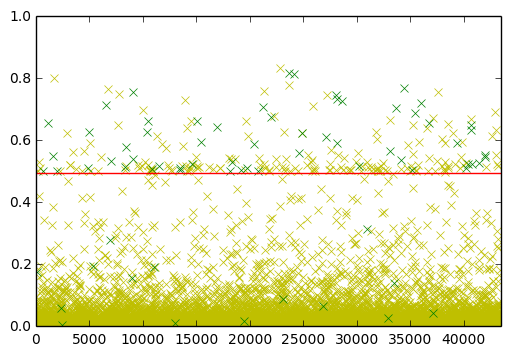

In [11]:
# small category plot
import matplotlib.pyplot as plt
# %matplotlib inline

doc_number = range(max(category_scores_series.index))

correct_scores = category_scores_series[y_expected == selected_category]
incorrect_scores = category_scores_series[y_expected != selected_category]

category_beta = score_tuner.beta_for_categories_provider(y_expected)[selected_category]
opt_threshold = score_tuner.maximize_f_score(y_expected, category_scores_series, selected_category, category_beta)

plt.plot(incorrect_scores.index, incorrect_scores.values, 'yx')
plt.plot(correct_scores.index, correct_scores.values, 'gx')
plt.plot([min(category_scores_series.index), max(category_scores_series.index)], [opt_threshold]*2, 'r')

plt.axis([0, max(doc_number), 0, 1])
plt.show()

In [12]:
opt_threshold

0.49485203405256473

In [13]:
selected_category = "openshift"
category_scores_series = score_df_norm[selected_category]
category_scores_series.describe()

count    4.347800e+04
mean     8.385560e-02
std      2.456278e-01
min      4.532395e-09
25%      2.340485e-04
50%      1.370514e-03
75%      8.455988e-03
max      9.989096e-01
Name: openshift, dtype: float64

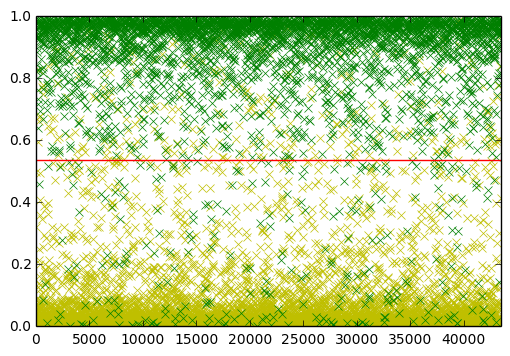

In [14]:
# small category scores plot with threshold as based on f-score with selected beta for given category
import matplotlib.pyplot as plt

doc_number = range(max(category_scores_series.index))
correct_scores = category_scores_series[y_expected == selected_category]
incorrect_scores = category_scores_series[y_expected != selected_category]

category_beta = score_tuner.beta_for_categories_provider(y_expected)[selected_category]
opt_threshold = score_tuner.maximize_f_score(y_expected, category_scores_series, selected_category, category_beta)

plt.plot(incorrect_scores.index, incorrect_scores.values, 'yx')
plt.plot(correct_scores.index, correct_scores.values, 'gx')
plt.plot([min(category_scores_series.index), max(category_scores_series.index)], [opt_threshold]*2, 'r')

plt.axis([0, max(doc_number), 0, 1])
plt.show()

Threshold might not converge exactly to the overall minimum, though at cases less sensitive convergence, the performance of threshold = 0.5 still seem to win

In [15]:
opt_threshold

0.53686919866328919

In [16]:
score_tuner.f_score_for_category(y_expected, category_scores_series, "openshift", opt_threshold, category_beta)

0.92484638156066723

In [17]:
score_tuner.f_score_for_category(y_expected, category_scores_series, "openshift", 0.5, category_beta)

0.92491393948534928